In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('/content/drive/MyDrive/sales_data_with_discounts.csv')

In [9]:
df.shape

(450, 13)

In [10]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [11]:
## To identify numerical columns
numerical_col=df.select_dtypes(include=['int64','float64'])
numerical_col

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [12]:
mean=numerical_col.mean()
median=numerical_col.median()
mode=numerical_col.mode().iloc[0]
std_dev=numerical_col.std()

stats=pd.DataFrame({'Mean':mean,'Median':median,'Mode':mode,'Standard Deviation':std_dev})
stats

,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


#####Interpretation
* Mean shows average values of the column
* Median indicates the middle value and is useful when data has outliers
* Mode represents the most repeated vale
* Standard deviation measures how data is spread out



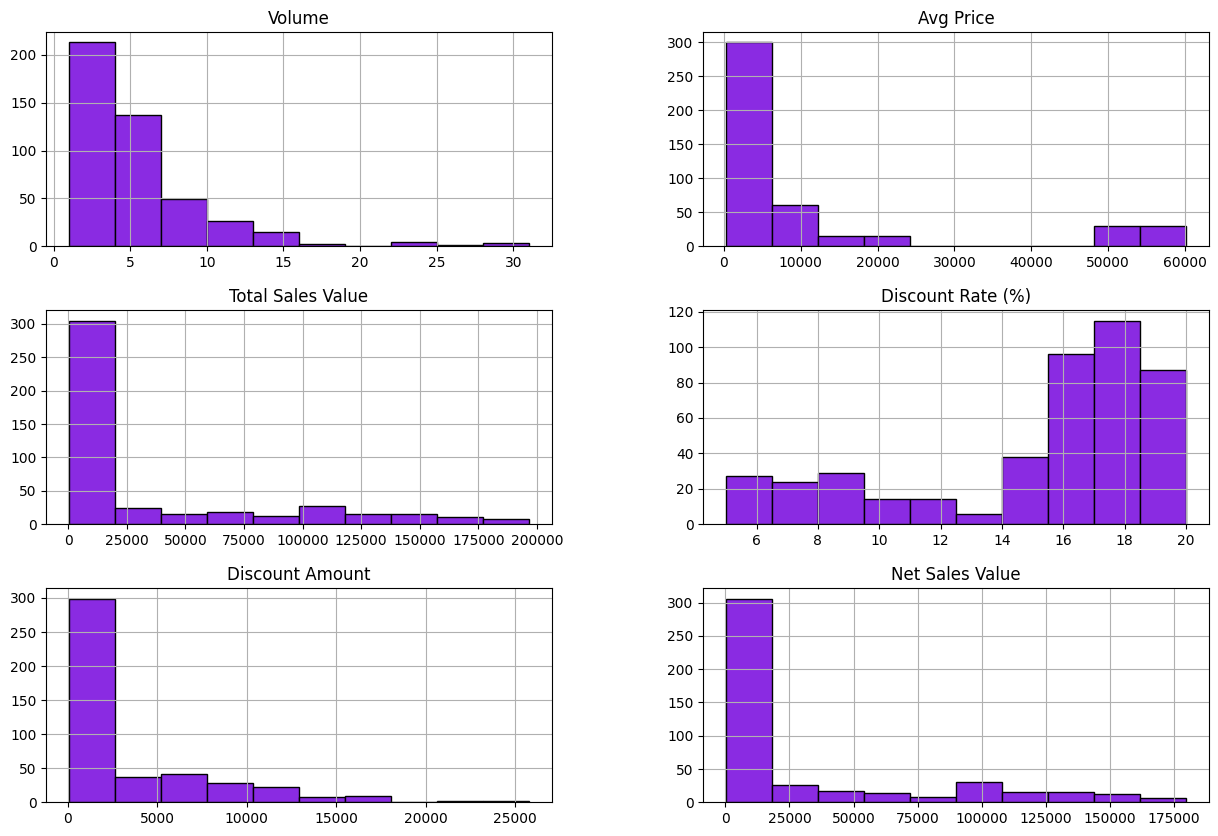

In [13]:
numerical_col.hist(figsize=(15,10),color='blueviolet',edgecolor='black');

####Interpretation
The histogram shows that some numerical variables are right-skewed,indicating higher frequency of lower values and presence of outliers

<Axes: >

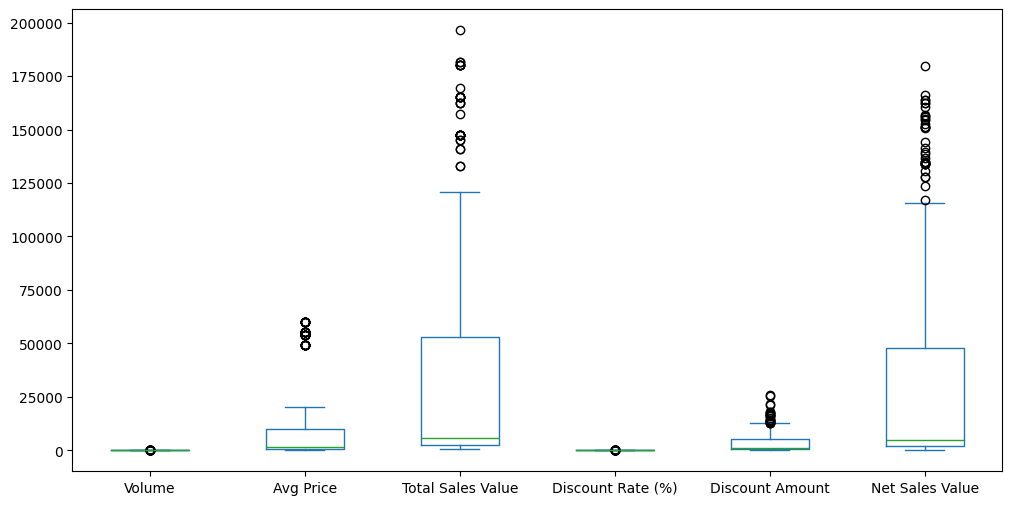

In [14]:
numerical_col.plot(kind='box',figsize=(12,6))

####Interpretation
Box plot show the outliers present in discount and sales related variables, which can impact further analysis

In [15]:
## To identify categorical columns
categorical_col=df.select_dtypes(include='object')
categorical_col

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [23]:
categorical_col.columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [36]:
df['Brand'].value_counts()

,count
Brand,
Jeera,90
Viva,60
Gear,60
RealU,45
YouM,45
Babaji,45
Vedic,45
Orange,30
Sumsang,30


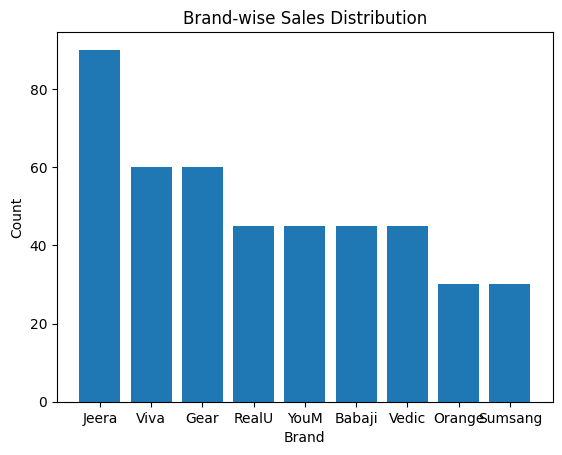

In [37]:
brand_counts=df['Brand'].value_counts()

plt.bar(brand_counts.index,brand_counts.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand-wise Sales Distribution')
plt.show()

##### The bar chart shows the distribution of brands sales. Brand with highest bars indicates higher in sales

#### Conclusion
 In this analysis, descriptive statistics were computed to understand the central tendency and variability of numerical features. Data visualization techniques such as histograms, box plots, and bar charts helped identify distributions, outliers, and category dominance. These insights are useful for data preprocessing and further predictive analysis.
